In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc, rcParams
import numpy as np
from bootstrap_utils import (define_grid_errband,
                             get_theta,
                             get_ratio_data)

rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [34]:
def plot_bootstrap( datapath, idx=20, bins=90, nreplicas = 90 ):
    
    f, (axs), (ax_histxs), gs = define_grid_errband( 1, 1, hspace=0.18, wspace=0.14, figsize=(10,7) )

    if idx == 20:
        R = ( 10, 170 )
        
    kwargs = { 'lw': 0.5, 'color': 'b', 'histtype': 'step', 'range': R,
               'density': False }
    hkwargs = { 'bins': bins, 'range': R, 'density': False }
    
    yresults = []
    for i in range( 1, nreplicas+1 ):
        filename = datapath + 'clasfilter_%d_476-fidvol-cms.npy' % i
        clasfilter0 = np.load( filename )
        if idx == 20:
            theta = get_theta( clasfilter0 )
            y0, b = np.histogram( theta  *  180/np.pi, **hkwargs )
        ysum = np.sum(y0)
        yresults.append( y0/ysum )
    bins = 0.5 * ( b[1:] + b[:-1] )
    
    ymean = np.mean( yresults, axis=0 )
    ystd = np.std( yresults, axis=0 )
    lsgan={}
    nstd = 1
    lsgan['x'] = bins
    lsgan['y'] = ymean
    lsgan['dy'] = ystd
    lsgan['y-sigma'] = ymean - nstd * ystd
    lsgan['y+sigma'] = ymean + nstd * ystd
    
    axs[0].fill_between( lsgan['x'], lsgan['y-sigma'], lsgan['y+sigma'], color='limegreen', alpha=0.5,
                         label='LSGAN bootstrap: %d replicas' % nreplicas )
    
    devents = np.load(datapath + 'evts-clas-fidvol-cms.npy')
    if idx == 20:
        theta = get_theta( devents )
        ydata, bdata = np.histogram( theta  *  180/np.pi, **hkwargs )
    ydsum = np.sum( ydata )
    
    ckwargs = { 'color': 'k', 
                'ecolor': 'k', 
                'elinewidth': 0.5,
                'capsize': 2,
                'capthick': 0.5,
                'alpha': 1.0,
                'label': 'CLAS Data: %2.1f M' % (ysum/1000000),
                'lw': 0, 'fmt': 'o', 'ms': 2 }
    
    bwidth = b[2]-b[1]
    axs[0].errorbar( bins, ydata/ydsum, yerr=np.sqrt(ydata)/np.sum(ydata), **ckwargs )
    (ylo, yhi) = axs[0].get_ylim()
    axs[0].set_ylim((0, yhi))
    
    r, dr = get_ratio_data( ax_histxs[0],
                            bins,
                            ydata/ydsum,
                            np.sqrt(ydata)/np.sum(ydata),
                            lsgan['y'],
                            0 )
    
    ax_histxs[0].fill_between(lsgan['x'],lsgan['y-sigma']/lsgan['y'],lsgan['y+sigma']/lsgan['y'],
                              color='limegreen',alpha=0.5,
                              label='LSGAN bootstrap: %d replicas' % nreplicas )
    
    ax_histxs[0].errorbar( bins, r, yerr=dr, color='k', ecolor='k', 
                           elinewidth=0.5, capsize=1, capthick=0.5, alpha=1.0, lw=0,
                           fmt='o', ms=2, label= 'CLAS Data: %2.1f M' % (ysum/1000000) )
    
    ax_histxs[0].grid( ls=':' )
    axs[0].set_ylabel(r'$Normalized~Yield$', fontsize=16)
    ax_histxs[0].set_ylabel(r'$Data/GAN$', fontsize=16)
    
    axs[0].legend()
    ax_histxs[0].legend( loc=8 )

    print_switch = 0 

    if idx == 20:
        ax_histxs[0].set_xlabel(r'$\theta_{\pi^+}^{CM}~(deg)$', fontsize=14)
        ftitle = 'lsgan-uncertainty-pipthcms-with-ratio.png'
            
    gs.tight_layout( f )
    if print_switch:
        f.savefig( ftitle, dpi=120 )

<ipython-input-4-e222e3fc3211>:2: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(x1 != 0, x1/x2, x1/x2)
<ipython-input-4-e222e3fc3211>:3: RuntimeWarning: invalid value encountered in true_divide
  dr = dx1/x2
<ipython-input-34-e722b343950b>:63: RuntimeWarning: invalid value encountered in true_divide
  ax_histxs[0].fill_between(lsgan['x'],lsgan['y-sigma']/lsgan['y'],lsgan['y+sigma']/lsgan['y'],


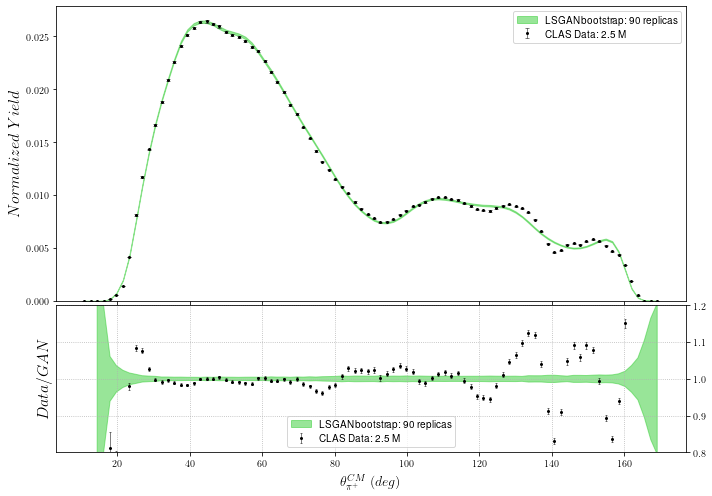

In [35]:
if __name__ == '__main__':
    
    datapath = '../../g2pipi/devel/data/bootstrap/'
    #
    # idx = 20 is a plot of the scattering angle of the pi+
    # This plot is implemented here as an example.
    #
    plot_bootstrap( datapath, idx=20, bins=90, nreplicas = 90 )
